In [1]:
from top2vec import Top2Vec
from gensim.models.coherencemodel import CoherenceModel
import os
import pandas as pd
from nltk.tokenize import word_tokenize

import gensim.corpora as corpora
from utils.config import random_sample,seed

In [2]:
import os
import pandas as pd

In [3]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

model_type = "top2vec"
model_name = "Top2Vec"
embedding_model = "nb-sbert-base"
data_type = "np_mini_stopwords"
file_name=f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"
file_name_data = f"{data_type}.csv"

experiment="embedding"
folder_path_topics = f"preprocessed_data/results/embedding/{model_type}"
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"
file_name_data = f"{data_type}.csv"


folder_name = f"Embedding-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)


df = load_from_file(folder_path_data,file_name_data)



data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [4]:
topic_model = None
try:
    topic_model = Top2Vec.load(file_path)
except:
    print("success")
    topic_model = Top2Vec(documents = new_data, embedding_model="NbAiLab/nb-sbert-base")

In [5]:
topic_model.save(file_path)

In [6]:
print(topic_model.embedding_model)

NbAiLab/nb-sbert-base


In [7]:
num_topics = topic_model.get_num_topics()
print(num_topics)

23


In [8]:
topic_sizes, topic_nums = topic_model.get_topic_sizes()

In [9]:
topic_words, word_scores, topic_nums = topic_model.get_topics(num_topics)

In [10]:
topic_word_scores = [dict(zip(topic_words[i][:], word_scores[i])) for i in topic_nums]

In [11]:
topic_model.get_topics()

(array([['saksordføreren', 'stortingets', 'høring', ..., 'partier',
         'forslag', 'meldingen'],
        ['økonomien', 'regjeringens', 'statsbudsjettet', ..., 'midler',
         'fremmet', 'styrking'],
        ['klimaforliket', 'gasskraftverk', 'utslippene', ..., 'styrking',
         'storting', 'saksordføreren'],
        ...,
        ['fengsel', 'kriminalitet', 'politi', ..., 'institusjoner',
         'politikere', 'tilfeller'],
        ['statsradens', 'statsraden', 'statens', ..., 'forholdene',
         'vurderinger', 'politiske'],
        ['boliger', 'bolig', 'finansiering', ..., 'kommuner', 'bygger',
         'politikere']], dtype='<U15'),
 array([[0.63124996, 0.6154434 , 0.59775335, ..., 0.49157345, 0.490942  ,
         0.49052006],
        [0.58000576, 0.55486333, 0.5423988 , ..., 0.44140887, 0.43891013,
         0.43838185],
        [0.6634167 , 0.51892734, 0.5154192 , ..., 0.40086442, 0.40012082,
         0.3996262 ],
        ...,
        [0.5838706 , 0.5774541 , 0.4309593

In [12]:
for i in range(num_topics):
    print("\n", i)
    print(topic_word_scores[i])



 0
{'saksordføreren': 0.63124996, 'stortingets': 0.6154434, 'høring': 0.59775335, 'regjeringens': 0.57767546, 'proposisjonen': 0.5763801, 'stortinget': 0.57468283, 'storting': 0.5728305, 'politikere': 0.5692583, 'representanten': 0.56462014, 'dagsordenen': 0.5642669, 'vedtak': 0.5598412, 'vedtaket': 0.554984, 'representanter': 0.54530656, 'representantene': 0.54501426, 'innstillingen': 0.5412539, 'politikk': 0.5387801, 'statsradens': 0.5346713, 'partiene': 0.5321761, 'opposisjonen': 0.5300089, 'regjeringa': 0.52799374, 'politikken': 0.52700055, 'velger': 0.5265336, 'innstillinga': 0.5255162, 'fremmet': 0.52396995, 'diskutert': 0.51969767, 'utredning': 0.51889956, 'hevder': 0.51494384, 'debatter': 0.5149058, 'valg': 0.5138028, 'komiteens': 0.51348215, 'regjeringen': 0.51084965, 'regjeringer': 0.5085826, 'saker': 0.5082437, 'statsrad': 0.50506294, 'vedtatt': 0.5048103, 'politiske': 0.50277984, 'statsraden': 0.50089383, 'debatten': 0.49927038, 'vedta': 0.49821118, 'debatt': 0.49788487, '

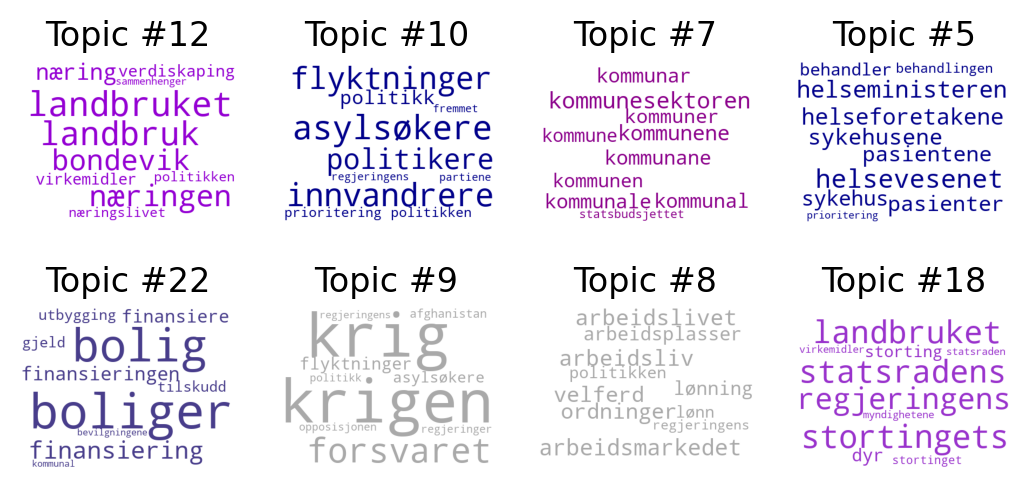

In [13]:

from utils.filemanagement import make_excerpt_wordcloud

excerpt_wordcloud = make_excerpt_wordcloud(topic_word_scores, num_topics,
                                           f"Sample from {model_name}-{embedding_model}: {data_type}",
                                           random_sample=random_sample, seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

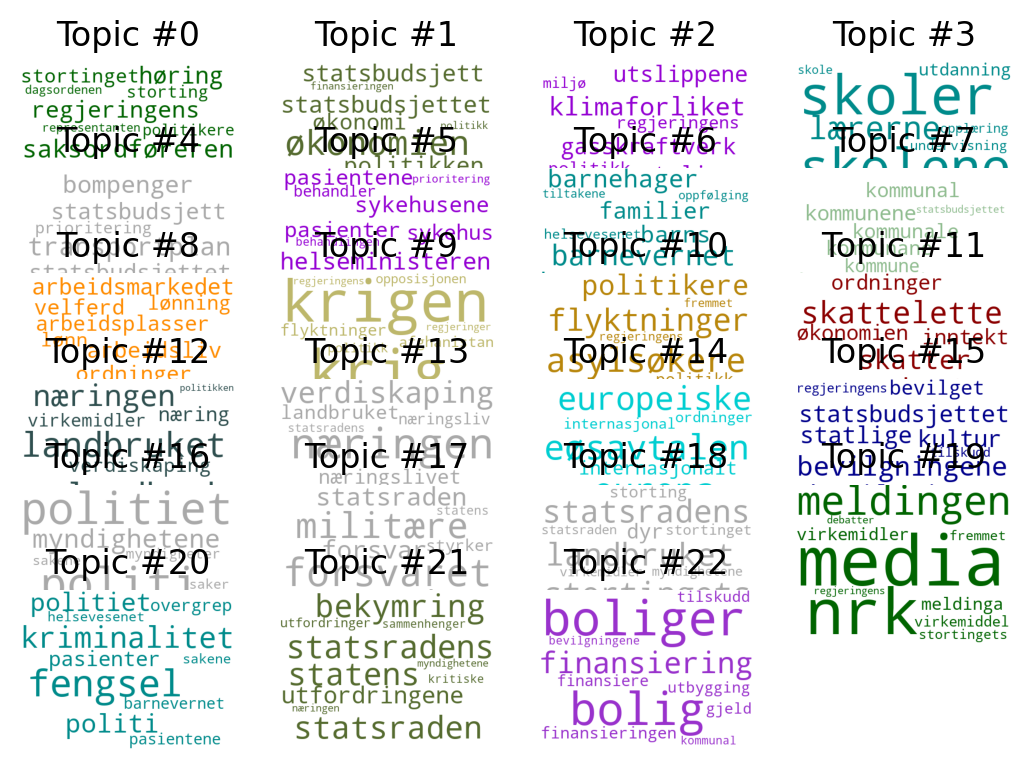

In [14]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(topic_word_scores, f"{model_name}-{embedding_model}: {data_type}",num_topics, dpi=200)


In [15]:
from utils.tables_and_plots import create_wordcloud

wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(num_topics):
    topic_wordcloud = create_wordcloud(topic_word_scores[i])
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [16]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, list(topic_words[i])) for i in range(num_topics)]

write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [17]:
from utils.filemanagement import load_model_topics


loaded_topics = load_model_topics(folder_path_topics, file_name)

In [18]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [19]:
len(loaded_topics.values())

23

In [20]:

from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [21]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [22]:
from utils.stats import compute_metrics
input_data = list(loaded_topics.values())
coherence, diversity = compute_metrics(
    input_data, word_frequencies, word_co_frequencies, 10)

10
('saksordføreren', 'stortingets') wordtuple
('saksordføreren', 'stortingets') wordup
15.0 over
16280.0 under
-10.083922483545091 -3.9068905956085187 2.5810608812234905 ('saksordføreren', 'stortingets') 15 110 148
('høring', 'saksordføreren') wordtuple
('høring', 'saksordføreren') wordup
6.0 over
8030.0 under
-10.386221771683521 -2.584962500721156 4.0179390489362845 ('høring', 'saksordføreren') 6 110 73
('regjeringens', 'saksordføreren') wordtuple
('regjeringens', 'saksordføreren') wordup
15.0 over
35640.0 under
-11.214319120800766 -3.9068905956085187 2.870394971747111 ('regjeringens', 'saksordføreren') 15 110 324
('proposisjonen', 'saksordføreren') wordtuple
('proposisjonen', 'saksordføreren') wordup
4.0 over
5830.0 under
-10.509280168087859 -2.0 5.254640084043929 ('proposisjonen', 'saksordføreren') 4 110 53
('saksordføreren', 'stortinget') wordtuple
('saksordføreren', 'stortinget') wordup
148.0 over
167860.0 under
-10.14744559473024 -7.209453365628949 1.4075194165355394 ('saksordfø

In [23]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.23978865201965077


In [24]:
diversity

0.6347826086956522

In [25]:
coherence

2.7435604716503286

In [26]:
from tabulate import tabulate
import csv

In [27]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒═════════════════════════════════════════╤═══════════╤══════════╕
│ Model                                   │ Metric    │    Value │
╞═════════════════════════════════════════╪═══════════╪══════════╡
│ top2vec_nb-sbert-base_np_mini_stopwords │ coherence │ 2.74356  │
├─────────────────────────────────────────┼───────────┼──────────┤
│ top2vec_nb-sbert-base_np_mini_stopwords │ diversity │ 0.634783 │
╘═════════════════════════════════════════╧═══════════╧══════════╛


In [28]:
# Save all topic stats to file

topic_stats_folder_path = f"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})